In [26]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')
interior =ctrl.Antecedent(np.arange(0,11,1), 'interior')
quota = ctrl.Antecedent(np.arange(0,11,1), 'quota')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(5)
service.automf(5)
interior.automf(5)
quota.automf(5)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['the worst'] = fuzz.trimf(tip.universe,[0,0,6])
tip['low'] = fuzz.trimf(tip.universe, [0, 6, 12])
tip['medium'] = fuzz.trimf(tip.universe, [6, 12, 18])
tip['high'] = fuzz.trimf(tip.universe, [12, 18, 22])
tip['amazing'] = fuzz.trimf(tip.universe,[18,22,25])

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


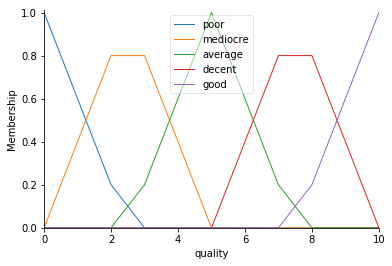

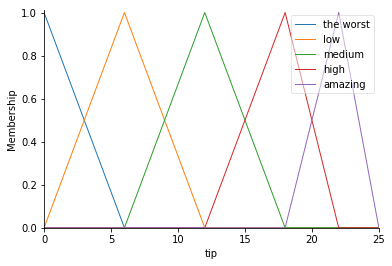

In [27]:
# You can see how these look with .view()
%matplotlib inline
quality.view()
tip.view()

In [32]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['the worst'])
rule2 = ctrl.Rule(quality['average']  & service['poor'] & quota['average'], tip['low'])
rule3 = ctrl.Rule(quality['good'] | service['good'] |  quota['good']| interior['good'], tip['amazing'])
rule4 = ctrl.Rule(quality['average'] & interior['average'] & service['average'] & quota['average'], tip['medium'] )
rule5 = ctrl.Rule(quality['poor'] & interior['poor'] & service['good'] & quota['good'], tip['medium'] )
rule6 = ctrl.Rule(quality['poor'] & interior['poor'] & service['average'] & quota['poor'], tip['low'] )
rule7 = ctrl.Rule(quality['average'] | service['good']  | quota['average']| interior['good'], tip['high'])

In [33]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


In [34]:
from ipywidgets import interact_manual
@interact_manual
def get_input(quality = 6.5, service = 5.0, interior = 8.8, quota = 9.0):
    tipping.input['quality'] = quality
    tipping.input['service'] = service
    tipping.input['interior'] = interior
    tipping.input['quota'] = quota
# Crunch the numbers
tipping.compute()

A Jupyter Widget

Recommended tip is 18.7954500495


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


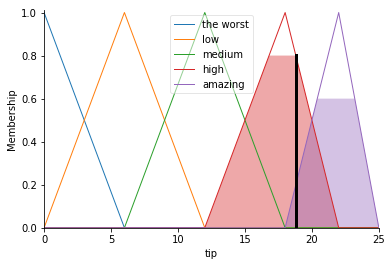

In [35]:
print('Recommended tip is',tipping.output['tip'])
tip.view(sim=tipping)
